In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


'\nDicionário de Dados\nPassengerId: Número de identificação do passageiro\nSurvived: Informa se o passageiro sobreviveu ao desastre\n0 = Não\n1 = Sim\nPclass: Classe do bilhete\n1 = 1ª Classe\n2 = 2ª Classe\n3 = 3ª Classe\nName: Nome do passageiro\nSex: Sexo do passageiro\nAge: Idade do passageiro\nSibSp: Quantidade de cônjuges e irmãos a bordo\nParch: Quantidade de pais e filhos a bordo\nTicket: Número da passagem\nFare: Preço da Passagem\nCabin: Número da cabine do passageiro\nEmbarked: Porto no qual o passageiro embarcou\nC = Cherbourg\nQ = Queenstown\nS = Southampton\n'

In [2]:
col_names = ['ta_native', 'course_instr', 'course', 'summer_regular', 'class_size', 'label']
train_url = "tae.csv"
train = pd.read_csv(train_url, header=None, names=col_names)

In [3]:
print("***** Conjunto de Treinamento *****")
print(train.head())

***** Conjunto de Treinamento *****
   ta_native  course_instr  course  summer_regular  class_size  label
0          1            23       3               1          19      3
1          2            15       3               1          17      3
2          1            23       3               2          49      3
3          1             5       2               2          33      3
4          2             7      11               2          55      3


In [4]:
print("***** Conjunto de Treinamento *****")
print(train.describe())

***** Conjunto de Treinamento *****
        ta_native  course_instr      course  summer_regular  class_size  \
count  151.000000    151.000000  151.000000      151.000000  151.000000   
mean     1.807947     13.642384    8.105960        1.847682   27.867550   
std      0.395225      6.825779    7.023914        0.360525   12.893758   
min      1.000000      1.000000    1.000000        1.000000    3.000000   
25%      2.000000      8.000000    3.000000        2.000000   19.000000   
50%      2.000000     13.000000    4.000000        2.000000   27.000000   
75%      2.000000     20.000000   15.000000        2.000000   37.000000   
max      2.000000     25.000000   26.000000        2.000000   66.000000   

            label  
count  151.000000  
mean     2.019868  
std      0.820327  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000  


In [5]:
print(train.columns.values)

['ta_native' 'course_instr' 'course' 'summer_regular' 'class_size' 'label']


In [6]:
# Verifica quais valores são nulos (conjunto de treino)
train.isna().head()

ta_native  course_instr  course  summer_regular  class_size  label
0      False         False   False           False       False  False
1      False         False   False           False       False  False
2      False         False   False           False       False  False
3      False         False   False           False       False  False
4      False         False   False           False       False  False

In [7]:
print("***** Realiza a soma dos registros com valores nulos (conjunto de treinamento) *****")
print(train.isna().sum())

***** Realiza a soma dos registros com valores nulos (conjunto de treinamento) *****
ta_native         0
course_instr      0
course            0
summer_regular    0
class_size        0
label             0
dtype: int64


In [8]:
# Preenche valores faltantes com a média da coluna (conjunto de treinamento)
train.fillna(train.mean(), inplace=True)

In [9]:
print(train.isna().sum())

ta_native         0
course_instr      0
course            0
summer_regular    0
class_size        0
label             0
dtype: int64


In [10]:
train[['ta_native', 'label']].groupby(['ta_native']).mean().sort_values(by='label', ascending=False)

label
ta_native          
1          2.448276
2          1.918033

In [11]:
train[["course_instr", "label"]].groupby(['course_instr']).mean().sort_values(by='label', ascending=False)

label
course_instr          
9             2.625000
23            2.352941
1             2.250000
10            2.250000
17            2.250000
6             2.250000
15            2.250000
18            2.125000
7             2.090909
13            2.071429
22            2.000000
24            2.000000
25            2.000000
14            1.875000
8             1.800000
20            1.800000
5             1.666667
12            1.500000
2             1.500000
16            1.500000
11            1.333333
4             1.000000
19            1.000000
21            1.000000
3             1.000000

In [12]:
train[["course", "label"]].groupby(['course']).mean().sort_values(by='label', ascending=False)

label
course          
14      3.000000
22      3.000000
21      3.000000
19      3.000000
6       2.500000
17      2.400000
25      2.333333
3       2.244444
5       2.200000
11      2.111111
24      2.000000
23      2.000000
26      2.000000
13      2.000000
12      2.000000
15      1.900000
9       1.666667
1       1.642857
2       1.625000
7       1.571429
18      1.500000
8       1.500000
16      1.333333
20      1.000000
10      1.000000
4       1.000000

In [13]:
train[["summer_regular", "label"]].groupby(['summer_regular']).mean().sort_values(by='label', ascending=False)

label
summer_regular          
1               2.565217
2               1.921875

In [14]:
train[["class_size", "label"]].groupby(['class_size']).mean().sort_values(by='label', ascending=False)

label
class_size          
55          3.000000
7           3.000000
9           3.000000
45          3.000000
54          3.000000
58          3.000000
33          3.000000
49          3.000000
39          3.000000
17          2.833333
25          2.666667
20          2.636364
11          2.250000
19          2.090909
27          2.000000
43          2.000000
44          2.000000
31          2.000000
30          2.000000
5           2.000000
35          2.000000
29          2.000000
46          2.000000
22          2.000000
18          2.000000
16          2.000000
24          2.000000
10          1.833333
21          1.750000
42          1.714286
38          1.666667
36          1.666667
23          1.666667
37          1.500000
15          1.500000
14          1.500000
13          1.500000
51          1.000000
48          1.000000
3           1.000000
34          1.000000
32          1.000000
28          1.000000
26          1.000000
12          1.000000
66          1.000000

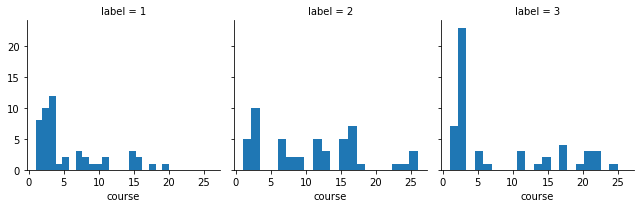

In [16]:
g = sns.FacetGrid(train, col='label')
g.map(plt.hist, 'course', bins=20)

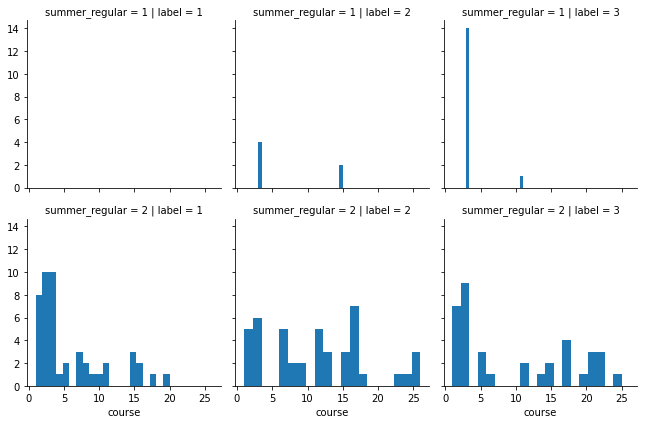

In [17]:
grid = sns.FacetGrid(train, col='label', row='summer_regular')
grid.map(plt.hist, 'course', bins=20)
grid.add_legend();

In [37]:
# Alguns atributos são numéricos e outros não ?? Não
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ta_native       151 non-null    int64
 1   course_instr    151 non-null    int64
 2   course          151 non-null    int64
 3   summer_regular  151 non-null    int64
 4   class_size      151 non-null    int64
 5   label           151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [38]:
train.head()

ta_native  course_instr  course  summer_regular  class_size  label
0          1            23       3               1          19      3
1          2            15       3               1          17      3
2          1            23       3               2          49      3
3          1             5       2               2          33      3
4          2             7      11               2          55      3

In [39]:
# Verificando se os valores são numéricos ou não
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ta_native       151 non-null    int64
 1   course_instr    151 non-null    int64
 2   course          151 non-null    int64
 3   summer_regular  151 non-null    int64
 4   class_size      151 non-null    int64
 5   label           151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [40]:
X = np.array(train.drop(['label'], 1).astype(float))

In [41]:
y = np.array(train['label'])

In [42]:
kmeans = KMeans(n_clusters=2) # Objetiva agrupar o conjunto em 2 grupos: Sobrevientes (Survived) ou Não Sobreviventes (Not survived)
kmeans.fit(X)
#print(kmeans.labels_)
print(kmeans.cluster_centers_)

[[ 1.75       12.21666667  8.5         1.98333333 41.06666667]
 [ 1.84615385 14.58241758  7.84615385  1.75824176 19.16483516]]


In [43]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.16556291390728478


In [44]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=2000)
kmeans.fit(X)

KMeans(max_iter=2000, n_clusters=2)

In [45]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.152317880794702


In [46]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.91666667, 0.08      , 0.        , 0.25396825],
       [1.        , 0.58333333, 0.08      , 0.        , 0.22222222],
       [0.        , 0.91666667, 0.08      , 1.        , 0.73015873],
       [0.        , 0.16666667, 0.04      , 1.        , 0.47619048],
       [1.        , 0.25      , 0.4       , 1.        , 0.82539683],
       [1.        , 0.91666667, 0.08      , 0.        , 0.26984127],
       [1.        , 0.33333333, 0.16      , 1.        , 0.25396825],
       [1.        , 0.375     , 0.08      , 1.        , 0.38095238],
       [0.        , 0.875     , 0.08      , 0.        , 0.87301587],
       [1.        , 0.58333333, 0.08      , 0.        , 0.26984127],
       [1.        , 0.375     , 0.84      , 1.        , 0.0952381 ],
       [1.        , 0.5       , 0.        , 1.        , 0.42857143],
       [1.        , 0.70833333, 0.8       , 1.        , 0.41269841],
       [1.        , 0.20833333, 0.64      , 1.        , 0.57142857],
       [1.        , 0.20833333, 0.

In [47]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=2000)
kmeans.fit(X_scaled)

KMeans(max_iter=2000, n_clusters=2)

In [48]:
correct = 0
for i in range(len(X_scaled)):
    predict_me = np.array(X_scaled[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.2913907284768212


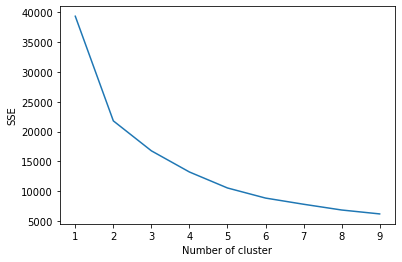

In [51]:
#Elbow Criterion Method:

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(X)
    #X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Soma das distâncias das instâncias para os seus clusters (agrupamentos) mais próximos.
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [52]:
#Silhouette Coefficient (titanic)

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(X)
    label = kmeans.labels_
    sil_coeff = metrics.silhouette_score(X, label, metric='euclidean')
    print("Para n_clusters={}, o coeficiente de  Silhouette {}".format(k, sil_coeff))

Para n_clusters=2, o coeficiente de  Silhouette 0.37686260181425646
Para n_clusters=3, o coeficiente de  Silhouette 0.33747665580946734
Para n_clusters=4, o coeficiente de  Silhouette 0.34323894977576824
Para n_clusters=5, o coeficiente de  Silhouette 0.3650776438781137
Para n_clusters=6, o coeficiente de  Silhouette 0.3683178458102646
Para n_clusters=7, o coeficiente de  Silhouette 0.3678106695348875
Para n_clusters=8, o coeficiente de  Silhouette 0.37700409248591954
Para n_clusters=9, o coeficiente de  Silhouette 0.38356013987918286
Para n_clusters=10, o coeficiente de  Silhouette 0.3869559714453195


In [53]:
from sklearn import datasets
Iris_X, y = datasets.load_iris(return_X_y=True)

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(Iris_X)
    label = kmeans.labels_
    sil_coeff = metrics.silhouette_score(Iris_X, label, metric='euclidean')
    print("Para n_clusters={}, o coeficiente de  Silhouette {}".format(k, sil_coeff))

Para n_clusters=2, o coeficiente de  Silhouette 0.681046169211746
Para n_clusters=3, o coeficiente de  Silhouette 0.5528190123564091
Para n_clusters=4, o coeficiente de  Silhouette 0.4980505049972867
Para n_clusters=5, o coeficiente de  Silhouette 0.4930804067193514
Para n_clusters=6, o coeficiente de  Silhouette 0.3648340039670018
Para n_clusters=7, o coeficiente de  Silhouette 0.3588294450965675
Para n_clusters=8, o coeficiente de  Silhouette 0.35974549238457515
Para n_clusters=9, o coeficiente de  Silhouette 0.321007926934356
Para n_clusters=10, o coeficiente de  Silhouette 0.32144177433890614


In [54]:
#Calinski-Harabasz Index
 
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(X)
    label = kmeans.labels_
    cal_haha = metrics.calinski_harabasz_score(X, label)
    print("Para k={}, o Calinski-Harabasz index é {}".format(k, cal_haha))

Para k=2, o Calinski-Harabasz index é 120.04262044283243
Para k=3, o Calinski-Harabasz index é 99.66676208871986
Para k=4, o Calinski-Harabasz index é 96.85312303279662
Para k=5, o Calinski-Harabasz index é 99.51968737018514
Para k=6, o Calinski-Harabasz index é 100.46536268967097
Para k=7, o Calinski-Harabasz index é 96.67950996913282
Para k=8, o Calinski-Harabasz index é 96.77427718748017
Para k=9, o Calinski-Harabasz index é 97.94488449383775
Para k=10, o Calinski-Harabasz index é 98.15078280836137


In [55]:
#Calinski-Harabasz Index
 
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(Iris_X)
    label = kmeans.labels_
    cal_haha = metrics.calinski_harabasz_score(Iris_X, label)
    print("Para k={}, o Calinski-Harabasz index é {}".format(k, cal_haha))

Para k=2, o Calinski-Harabasz index é 513.9245459802768
Para k=3, o Calinski-Harabasz index é 561.62775662962
Para k=4, o Calinski-Harabasz index é 530.7658081872851
Para k=5, o Calinski-Harabasz index é 495.54148767768777
Para k=6, o Calinski-Harabasz index é 473.51545388247683
Para k=7, o Calinski-Harabasz index é 444.56007064310165
Para k=8, o Calinski-Harabasz index é 435.32089782589105
Para k=9, o Calinski-Harabasz index é 410.7088779822991
Para k=10, o Calinski-Harabasz index é 392.1404205009519
